In [99]:
!pip install selenium

In [100]:
import selenium
from selenium import webdriver
import time
import pandas as pd
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException,ElementNotInteractableException
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [101]:
driver = webdriver.Chrome(r"C:\chromedriver1.exe")
time.sleep(2)

In [102]:
driver.get("https://www.olx.in/cars_c84")


In [103]:
Brand=[]
try:
    Bran=driver.find_elements_by_xpath("//div[@class='_2tW1I']")
    for i in Bran:
        Brand.append(i.text)
except NoSuchElementException:#handling no such element exception
    Brand.append('No details available')
except StaleElementReferenceException:#handling Stale element exception
    Brand.append('No details available')
time.sleep(2)

#scraping names of the model
model=[]
try:
    mode=driver.find_elements_by_xpath("//div[@class='_3tLee']")
    for i in mode:
        model.append(i.text)
except NoSuchElementException:#handling no such element exception
    model.append('No details available')
except StaleElementReferenceException:#handling Stale element exception
    model.append('No details available')
    time.sleep(2)

#scraping names of the variant
variant=[]
try:
    vari=driver.find_elements_by_xpath("//div[@class='_3qDp0']")
    for i in vari:
        variant.append(i.text)
except NoSuchElementException:#handling no such element exception
    variant.append('No details available')
except StaleElementReferenceException:#handling Stale element exception
    variant.append('No details available')
    time.sleep(2)

#scraping manufacturing year
myear=[]
try:
    myr=driver.find_elements_by_xpath("//div[@class='_35xN1']")
    for i in myr:
        myear.append(i.text)
except NoSuchElementException:#handling no such element exception
    myear.append('No details available')
except StaleElementReferenceException:#handling Stale element exception
    myear.append('No details available')
time.sleep(2)

#scraping driven km
dkm=[]
try:
    km=driver.find_elements_by_xpath("//div[@class='_3qDp0']")
    for i in km:
        dkm.append(i.text)
except NoSuchElementException:#handling no such element exception
    dkm.append('No details available')
except StaleElementReferenceException:#handling Stale element exception
    dkm.append('No details available')
     
    
#preparing dataframe
df=pd.DataFrame({"Brand Of car":Brand,
                 "Model Name":model,
                "Variant of car":variant,
               "Manufacturing Year":myear,
               "Driven KM":dkm})
df        
#df.to_csv (r'C:\Users\hm\Desktop\car.csv', index = False, header=True)

#print (df)

,Brand Of car,Model Name,Variant of car,Manufacturing Year,Driven KM


In [104]:
data = pd.read_csv('car')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,1
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,2


In [105]:
data.shape

(4340, 8)

In [106]:
data.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner             int64
dtype: object

In [107]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [108]:
data['selling_price'].describe()

count    4.340000e+03
mean     5.041273e+05
std      5.785487e+05
min      2.000000e+04
25%      2.087498e+05
50%      3.500000e+05
75%      6.000000e+05
max      8.900000e+06
Name: selling_price, dtype: float64

In [109]:
print('Unique elements in Seller_Type are',data['seller_type'].unique())
print('Unique elements in Fuel_Type are',data['fuel'].unique())
print('Unique elements in Transmission are',data['transmission'].unique())
print('Unique elements in Owner are',data['owner'].unique())
print('Unique elements in Year are',data['year'].unique())

Unique elements in Seller_Type are ['Individual' 'Dealer' 'Trustmark Dealer']
Unique elements in Fuel_Type are ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
Unique elements in Transmission are ['Manual' 'Automatic']
Unique elements in Owner are [1 2 4 3 0]
Unique elements in Year are [2007 2012 2017 2014 2016 2015 2018 2019 2013 2011 2010 2009 2006 1996
 2005 2008 2004 1998 2003 2002 2020 2000 1999 2001 1995 1997 1992]


In [110]:
print('Unique elements in Car_Name are',data['name'].nunique())

Unique elements in Car_Name are 1491


In [111]:
dataset=data[['year','selling_price','km_driven','fuel','seller_type','transmission','owner']]
dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,1
1,2007,135000,50000,Petrol,Individual,Manual,1
2,2012,600000,100000,Diesel,Individual,Manual,1
3,2017,250000,46000,Petrol,Individual,Manual,1
4,2014,450000,141000,Diesel,Individual,Manual,2


In [112]:
dataset['Present_Year']=2021
dataset['Number_of_Years_Old']=dataset['Present_Year']- dataset['year']
dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Present_Year,Number_of_Years_Old
0,2007,60000,70000,Petrol,Individual,Manual,1,2021,14
1,2007,135000,50000,Petrol,Individual,Manual,1,2021,14
2,2012,600000,100000,Diesel,Individual,Manual,1,2021,9
3,2017,250000,46000,Petrol,Individual,Manual,1,2021,4
4,2014,450000,141000,Diesel,Individual,Manual,2,2021,7


In [113]:

dataset.drop(labels=['year', 'Present_Year'],axis=1,inplace=True)
dataset.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,Number_of_Years_Old
0,60000,70000,Petrol,Individual,Manual,1,14
1,135000,50000,Petrol,Individual,Manual,1,14
2,600000,100000,Diesel,Individual,Manual,1,9
3,250000,46000,Petrol,Individual,Manual,1,4
4,450000,141000,Diesel,Individual,Manual,2,7


 Encoding the Categorical Variables

In [114]:
#select categorical variables from then dataset, and then implement categorical encoding for nominal variables
Fuel_Type=dataset[['fuel']]
Fuel_Type=pd.get_dummies(Fuel_Type, drop_first=True)

Seller_Type=dataset[['seller_type']]
Seller_Type=pd.get_dummies(Seller_Type, drop_first=True)

Transmission=dataset[['transmission']]
Transmission=pd.get_dummies(Transmission, drop_first=True)



dataset=pd.concat([dataset,Fuel_Type, Seller_Type, Transmission], axis=1)

dataset.drop(labels=['fuel', 'seller_type', 'transmission'], axis=1, inplace=True)

dataset.head()

,selling_price,km_driven,owner,Number_of_Years_Old,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,60000,70000,1,14,0,0,0,1,1,0,1
1,135000,50000,1,14,0,0,0,1,1,0,1
2,600000,100000,1,9,1,0,0,0,1,0,1
3,250000,46000,1,4,0,0,0,1,1,0,1
4,450000,141000,2,7,1,0,0,0,1,0,1


In [115]:
dataset.columns

Index(['selling_price', 'km_driven', 'owner', 'Number_of_Years_Old',
       'fuel_Diesel', 'fuel_Electric', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual'],
      dtype='object')

In [116]:

# Dataset Correlation
dataset.corr()

,selling_price,km_driven,owner,Number_of_Years_Old,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
selling_price,1.000000,-0.192289,-0.228091,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205
km_driven,-0.192289,1.000000,0.321848,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226
owner,-0.228091,0.321848,1.000000,0.468678,-0.002201,0.011789,0.029943,-0.008409,0.265812,-0.088840,0.083226
Number_of_Years_Old,-0.413922,0.419688,0.468678,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800
fuel_Diesel,0.282947,0.285396,-0.002201,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098
fuel_Electric,-0.005095,-0.001372,0.011789,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746
fuel_LPG,-0.042434,0.036652,0.029943,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764
fuel_Petrol,-0.269453,-0.291139,-0.008409,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614
seller_type_Individual,-0.236798,0.182663,0.265812,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163
seller_type_Trustmark Dealer,0.110176,-0.089858,-0.088840,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346


Data Visualization and Correlation

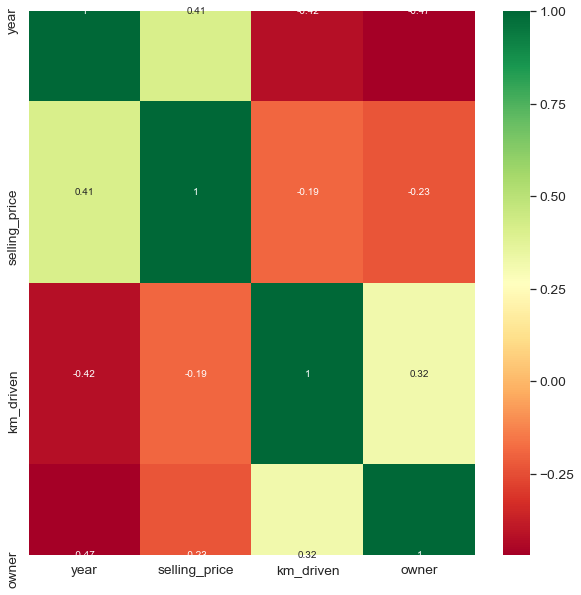

In [117]:
#Correlations of features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#Plot heat map
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [118]:
sell=dataset['selling_price']
dataset.drop(['selling_price'], axis=1, inplace=True)
dataset=dataset.join(sell)
dataset.head()

,km_driven,owner,Number_of_Years_Old,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,selling_price
0,70000,1,14,0,0,0,1,1,0,1,60000
1,50000,1,14,0,0,0,1,1,0,1,135000
2,100000,1,9,1,0,0,0,1,0,1,600000
3,46000,1,4,0,0,0,1,1,0,1,250000
4,141000,2,7,1,0,0,0,1,0,1,450000


In [119]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

[2.37319453e-01 2.87302770e-02 2.53336400e-01 1.29528415e-01
 7.89602236e-05 2.04897832e-05 2.85660628e-04 4.99042701e-02
 7.96874937e-03 2.92827325e-01]


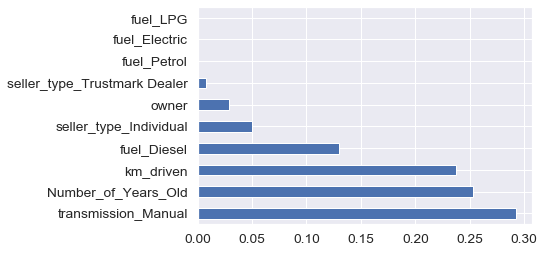

In [120]:
### To determine important features, make use of ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

print(model.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Model Building and Training

In [121]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [122]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import StratifiedKFold
#kfold = StratifiedKFold(n_splits=3)

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Decision Tree Regressor

Decision Tree Score on Training set is 0.9656390238966865
Decision Tree Score on Test Set is 0.29160872643297653
[ 0.53553271  0.41966033  0.33175559  0.44905267 -0.04566806]
Accuracy: 33.81 %
Standard Deviation: 20.26 %
Mean Absolute Error: 188811.21012342538
Mean Squared Error: 241533305292.66946
RMSE: 491460.3801861036
The r2_score is 0.29160872643297653


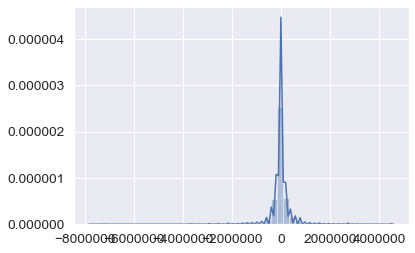

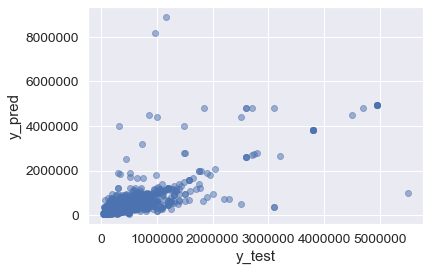

In [124]:

from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state = 0)
dt_reg.fit(X_train, y_train)
y_pred=dt_reg.predict(X_test)

print("Decision Tree Score on Training set is",dt_reg.score(X_train, y_train))#Training Accuracy
print("Decision Tree Score on Test Set is",dt_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(dt_reg, X_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

 Random Forest Regression

Random Forest Score on Training set is 0.7582721806936715
Random Forest Score on Test Set is 0.6677545743090467
[0.68108605 0.59272573 0.4819165  0.69070672 0.62463981]
Accuracy: 61.42 %
Standard Deviation: 7.54 %
Mean Absolute Error: 176741.64676737474
Mean Squared Error: 113282501958.8745
RMSE: 336574.6603041805
The r2_score is 0.6677545743090467


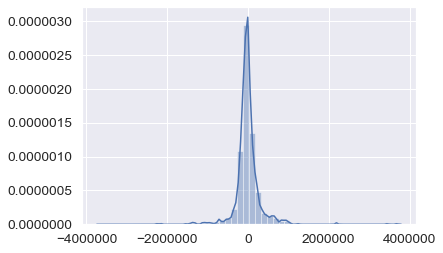

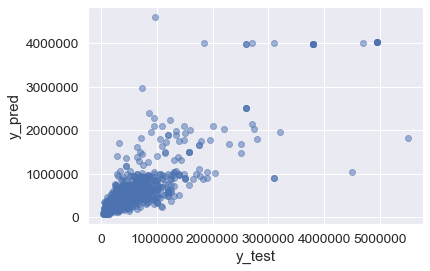

In [125]:

from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=400,min_samples_split=15,min_samples_leaf=2,
max_features='auto', max_depth=30)
rf_reg.fit(X_train, y_train)
y_pred=rf_reg.predict(X_test)

print("Random Forest Score on Training set is",rf_reg.score(X_train, y_train))#Training Accuracy
print("Random Forest Score on Test Set is",rf_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(rf_reg, X_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

Voting Regressor

Voting Regresssor Score on Training set is 0.9132189023511328
Voting Regresssor Score on Test Set is 0.5763897477588421
[0.65676577 0.55913017 0.44950012 0.63084921 0.43603476]
Accuracy: 54.65 %
Standard Deviation: 9.06 %
Mean Absolute Error: 174532.80560730724
Mean Squared Error: 144434281162.82098
RMSE: 380045.104116368
The r2_score is 0.5763897477588421


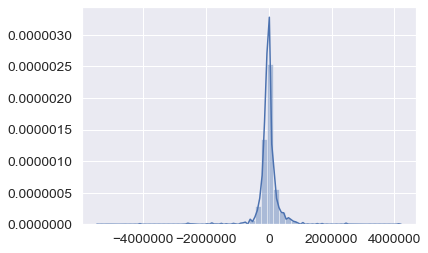

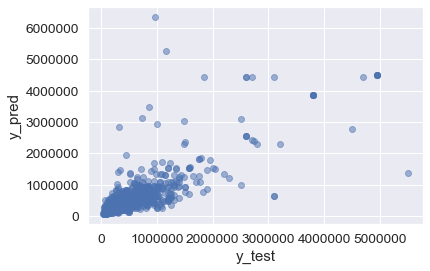

In [126]:
from sklearn.ensemble import VotingRegressor
vot_reg = VotingRegressor([('DecisionTree', dt_reg), ('RandomForestRegressor', rf_reg)])
vot_reg.fit(X_train, y_train)
y_pred=vot_reg.predict(X_test)

print("Voting Regresssor Score on Training set is",vot_reg.score(X_train, y_train))#Training Accuracy
print("Voting Regresssor Score on Test Set is",vot_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(vot_reg, X_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

 Dump the model selected as a Pickle File

In [131]:
import pickle
pickle.dump(vot_reg, open("vot_reg.pkl", "wb"))

# load model from file
model = pickle.load(open("vot_reg.pkl", "rb"))